In [55]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [56]:
class MyLinearRegression:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        
    def fit(self, X, y):
        # Get X, y and count weights
        
        n, k = X.shape
        
        X_train = X
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))
            print(X_train)
        
        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y
        
        return self
    
    def predict(self, X):
        # Get X and return model responses
        n, k = X.shape
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))
            
        y_pred = X_train @ self.w
        
        return y_pred
        
    def get_weights(self):
        return self.w

In [57]:
from sklearn.model_selection import train_test_split


In [58]:
# besed on features, generate target values with some noise
def linear_expression(X):
    return 5 * X + 6

objects_num = 50
X = np.linspace(-5, 5, objects_num)
y = linear_expression(X) + np.random.randn(objects_num) * 5

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

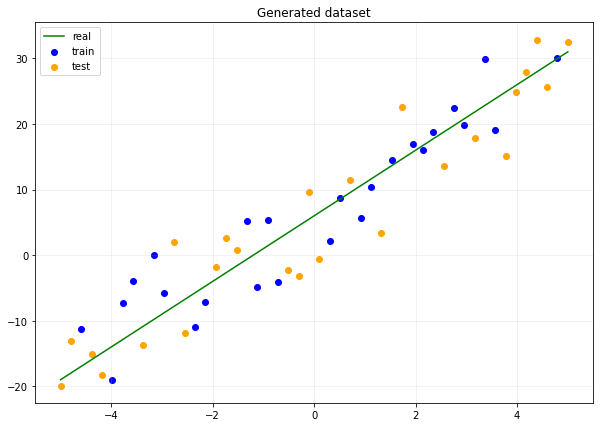

In [59]:
plt.figure(figsize=(10, 7))
plt.plot(X, linear_expression(X), label='real', color='g')
plt.scatter(X_train, y_train, label='train', color='b')
plt.scatter(X_test, y_test, label='test', color='orange')

plt.title("Generated dataset")
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [60]:
regressor = MyLinearRegression()

regressor.fit(X_train[:, np.newaxis], y_train)

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()
w

[[-3.16326531  1.        ]
 [-2.95918367  1.        ]
 [-1.12244898  1.        ]
 [-3.57142857  1.        ]
 [ 0.51020408  1.        ]
 [-3.97959184  1.        ]
 [ 2.14285714  1.        ]
 [-3.7755102   1.        ]
 [-2.14285714  1.        ]
 [ 0.91836735  1.        ]
 [ 3.57142857  1.        ]
 [ 2.95918367  1.        ]
 [-0.71428571  1.        ]
 [-2.34693878  1.        ]
 [ 1.12244898  1.        ]
 [ 0.30612245  1.        ]
 [-4.59183673  1.        ]
 [ 2.75510204  1.        ]
 [ 3.36734694  1.        ]
 [ 4.79591837  1.        ]
 [-0.91836735  1.        ]
 [ 1.93877551  1.        ]
 [-1.32653061  1.        ]
 [ 2.34693878  1.        ]
 [ 1.53061224  1.        ]]


array([4.61424523, 6.45349327])

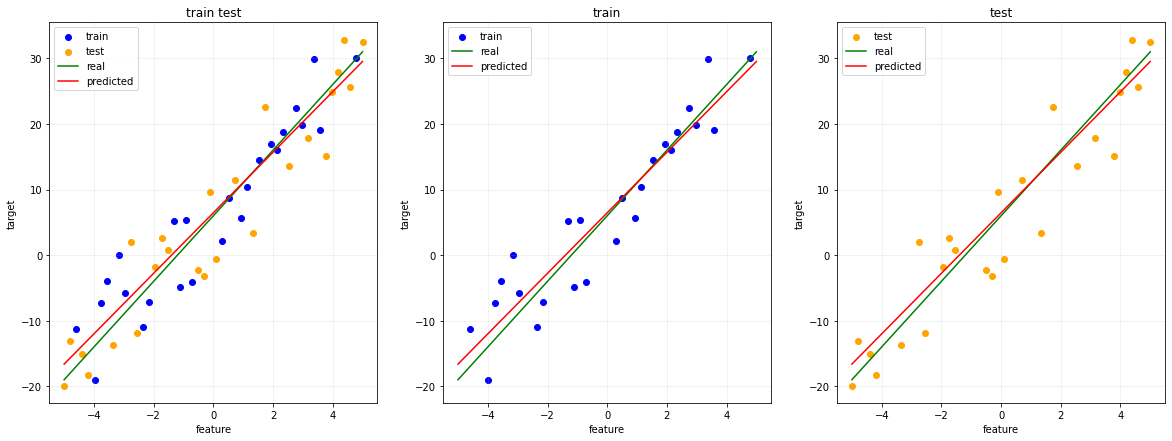

In [61]:
plt.figure(figsize=(20, 7))
ax = None

for i, types in enumerate([['train', 'test'], ['train'], ['test']]):
    ax = plt.subplot(1, 3, i + 1, sharey=ax)
    if 'train' in types:
        plt.scatter(X_train, y_train, label='train', color='b')
    if 'test' in types:
        plt.scatter(X_test, y_test, label='test', color='orange')
        
    plt.plot(X, linear_expression(X), label='real', c='g')
    plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')
    
    plt.ylabel('target')
    plt.xlabel('feature')
    plt.title(' '.join(types))
    plt.grid(alpha=0.2)
    plt.legend()
plt.show()

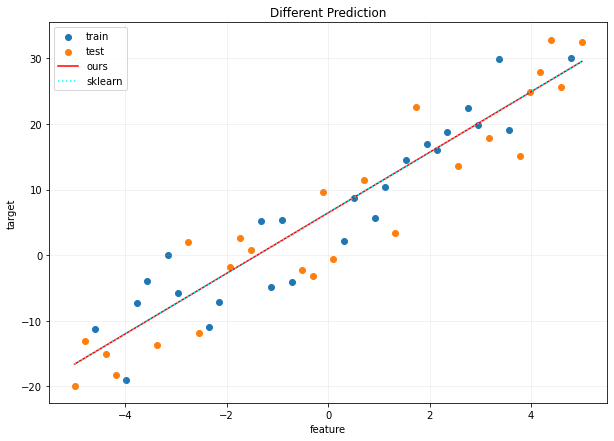

In [62]:
sk_reg = LinearRegression().fit(X_train[:, np.newaxis], y_train)

plt.figure(figsize=(10, 7))
#plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X[:, np.newaxis]),
         label='ours', c='r', linestyle='-')
plt.plot(X, sk_reg.predict(X[:, np.newaxis]), 
         label='sklearn', c='cyan', linestyle=':')

plt.title('Different Prediction')
plt.ylabel('target')
plt.xlabel('feature')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

test_predictions = regressor.predict(X_test[:, np.newaxis])

print('Test MSE: ', mean_squared_error(y_test, test_predictions))
print("MAE:", mean_absolute_error(regressor.predict(X_test[:, np.newaxis]), y_test))

Test MSE:  27.864263154647357
MAE: 4.526807613663627


# Градиентная оптимизация

In [68]:
regressor = MyGradientLinearRegression(fit_intercept=True)

l = regressor.fit(X_train[:, np.newaxis], y_train, max_iter=100).get_losses()

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()

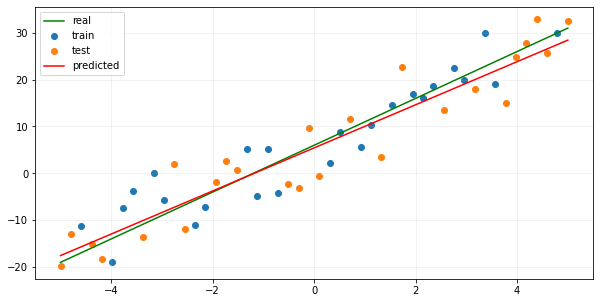

4.493565264681846


In [69]:
from sklearn.metrics import mean_absolute_error

plt.figure(figsize=(10, 5))
plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')

plt.grid(alpha=0.2)
plt.legend()
plt.show()

print(mean_absolute_error(regressor.predict(X_test[:, np.newaxis]), y_test))

### график лосса во время обучени

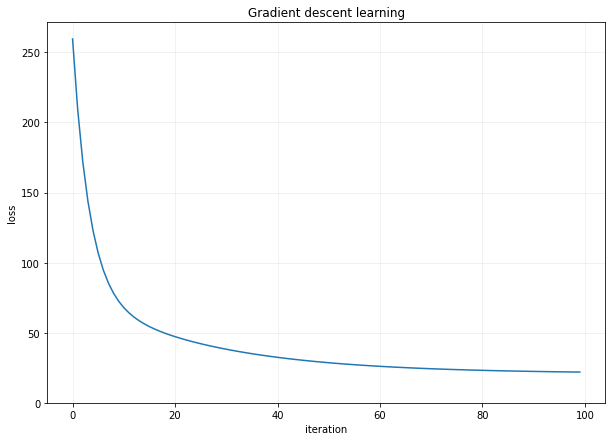

In [74]:
plt.figure(figsize=(10, 7))

plt.plot(l)

plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.ylim(bottom=0)
plt.grid(alpha=0.2)
plt.show()

### SGD

In [82]:
class MySGDLinearRegression(MyGradientLinearRegression):
    def __init__(self, n_sample=10, **kwargs):
        super().__init__(**kwargs) # передает именные парамертры род классу
        self.w = None
        self.n_sample = n_sample
        
    def _calc_gradient(self, X, y, y_pred):
        inds = np.random.choice(np.arange(X.shape[0]), size=self.n_sample, replace=False)
        
        grad = 2 * (y_pred[inds] - y[inds])[:, np.newaxis] * X[inds]
        grad = grad.mean(axis=0)
        
        return grad
            

In [83]:
regressor = MySGDLinearRegression(fit_intercept=True)

l = regressor.fit(X_train[:, np.newaxis], y_train, max_iter=100).get_losses()

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()

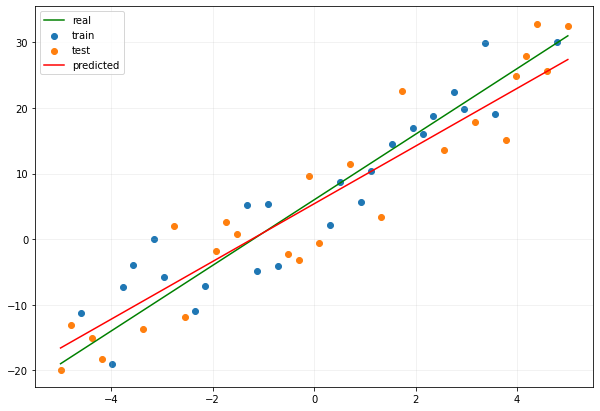

In [84]:
plt.figure(figsize=(10, 7))
plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')

plt.grid(alpha=0.2)
plt.legend()
plt.show()

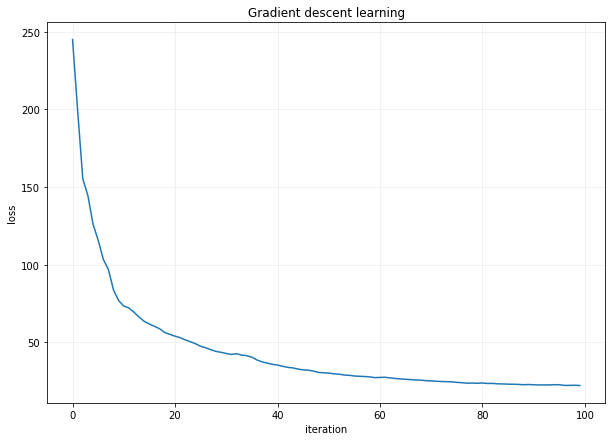

In [85]:
plt.figure(figsize=(10, 7))

plt.plot(l)

plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.grid(alpha=0.2)
plt.show()

In [86]:
n_samples = [1, 2, 4]

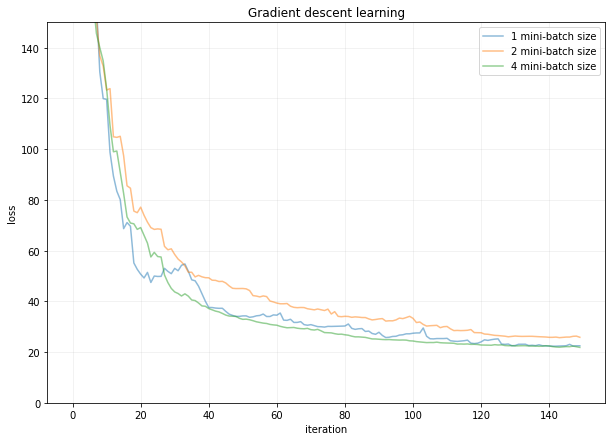

In [88]:
plt.figure(figsize=(10, 7))

for ns in n_samples:
    l = MySGDLinearRegression(fit_intercept=True, n_sample=ns).fit(
        X_train[:, np.newaxis],
        y_train,
        lr=5e-3,
        max_iter=150,
    ).get_losses()
    plt.plot(l, alpha=0.5, label=f'{ns} mini-batch size')
    
plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')

plt.legend()
plt.ylim((0, 150))
plt.grid(alpha=0.2)
plt.show()
